In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import calmap as cm
#from pandas_profiling import ProfileReport
print("Modules are imported")


Modules are imported


In [2]:
#pull data 
df = pd.read_csv('supermarket_sales.csv')

In [3]:
#view data
df.head()

,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,1/28/19,12:43,Cash,702.63,4.761904762,35.1315.1,4.5
0,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8.0,33.512,703.752,1/10/19,14:49,Cash,670.24,4.761905,33.512,5.1
1,595-11-5460,A,Yangon,NaN,Male,Health and beauty,96.58,2.0,9.658,202.818,3/15/19,10:12,Credit card,193.16,4.761905,9.658,5.1
2,183-56-6882,C,Naypyitaw,NaN,Female,Food and beverages,99.42,4.0,19.884,417.564,2/6/19,10:42,Ewallet,397.68,4.761905,19.884,7.5
3,232-16-2483,C,Naypyitaw,NaN,Female,Sports and travel,68.12,1.0,3.406,71.526,1/7/19,12:28,Ewallet,68.12,4.761905,3.406,6.8
4,129-29-8530,A,Yangon,NaN,Male,Sports and travel,62.62,5.0,15.655,328.755,3/10/19,19:15,Ewallet,313.10,4.761905,15.655,7.0


In [4]:
#view columns
df.columns

Index(['149-71-6266', 'B', 'Mandalay', 'Member', 'Male', 'Sports and travel',
       '78.07', '9', '35.1315', '737.7615', '1/28/19', '12:43', 'Cash',
       '702.63', '4.761904762', '35.1315.1', '4.5'],
      dtype='object')

In [5]:
#renamed columns
df.rename(columns={"149-71-6266":"InvoiceID","B":"Branch","Mandalay":"City","Member":"CustomerTyper","Male":"Gender",
                   "Sports and travel":"ProductLine","78.07":"Unitprice","9":"Qty","35.1315":"Tax 5%","737.7615":"Total",
                  "1/28/19":"Date","12:43":"Time","Cash":"Payment","702.63":"cogs","4.761904762":"grossmarginpercentage",
                  "35.1315.1":"grossincome","4.5":"Rating"},inplace=True)

In [6]:
df.head()

,InvoiceID,Branch,City,CustomerTyper,Gender,ProductLine,Unitprice,Qty,Tax 5%,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
0,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8.0,33.512,703.752,1/10/19,14:49,Cash,670.24,4.761905,33.512,5.1
1,595-11-5460,A,Yangon,NaN,Male,Health and beauty,96.58,2.0,9.658,202.818,3/15/19,10:12,Credit card,193.16,4.761905,9.658,5.1
2,183-56-6882,C,Naypyitaw,NaN,Female,Food and beverages,99.42,4.0,19.884,417.564,2/6/19,10:42,Ewallet,397.68,4.761905,19.884,7.5
3,232-16-2483,C,Naypyitaw,NaN,Female,Sports and travel,68.12,1.0,3.406,71.526,1/7/19,12:28,Ewallet,68.12,4.761905,3.406,6.8
4,129-29-8530,A,Yangon,NaN,Male,Sports and travel,62.62,5.0,15.655,328.755,3/10/19,19:15,Ewallet,313.10,4.761905,15.655,7.0


In [7]:
df.dtypes

InvoiceID                 object
Branch                    object
City                      object
CustomerTyper             object
Gender                    object
ProductLine               object
Unitprice                float64
Qty                      float64
Tax 5%                   float64
Total                    float64
Date                      object
Time                      object
Payment                   object
cogs                     float64
grossmarginpercentage    float64
grossincome              float64
Rating                   float64
dtype: object

In [8]:
#setting Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df.dtypes

InvoiceID                        object
Branch                           object
City                             object
CustomerTyper                    object
Gender                           object
ProductLine                      object
Unitprice                       float64
Qty                             float64
Tax 5%                          float64
Total                           float64
Date                     datetime64[ns]
Time                             object
Payment                          object
cogs                            float64
grossmarginpercentage           float64
grossincome                     float64
Rating                          float64
dtype: object

In [10]:
df.set_index('Date',inplace=True)

In [11]:
df.head()

,InvoiceID,Branch,City,CustomerTyper,Gender,ProductLine,Unitprice,Qty,Tax 5%,Total,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
Date,,,,,,,,,,,,,,,,
2019-01-10,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8.0,33.512,703.752,14:49,Cash,670.24,4.761905,33.512,5.1
2019-03-15,595-11-5460,A,Yangon,NaN,Male,Health and beauty,96.58,2.0,9.658,202.818,10:12,Credit card,193.16,4.761905,9.658,5.1
2019-02-06,183-56-6882,C,Naypyitaw,NaN,Female,Food and beverages,99.42,4.0,19.884,417.564,10:42,Ewallet,397.68,4.761905,19.884,7.5
2019-01-07,232-16-2483,C,Naypyitaw,NaN,Female,Sports and travel,68.12,1.0,3.406,71.526,12:28,Ewallet,68.12,4.761905,3.406,6.8
2019-03-10,129-29-8530,A,Yangon,NaN,Male,Sports and travel,62.62,5.0,15.655,328.755,19:15,Ewallet,313.10,4.761905,15.655,7.0


In [12]:
df.describe()

,Unitprice,Qty,Tax 5%,Total,cogs,grossmarginpercentage,grossincome,Rating
count,964.000000,951.000000,971.000000,971.000000,971.000000,9.710000e+02,971.000000,971.000000
mean,55.622832,5.501577,15.346091,322.267914,306.921823,4.761905e+00,15.346091,6.984655
std,26.568059,2.936118,11.748890,246.726690,234.977800,8.886361e-16,11.748890,1.714769
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,32.580000,3.000000,5.833250,122.498250,116.665000,4.761905e+00,5.833250,5.500000
50%,55.230000,5.000000,12.060000,253.260000,241.200000,4.761905e+00,12.060000,7.000000
75%,77.935000,8.000000,22.429000,471.009000,448.580000,4.761905e+00,22.429000,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


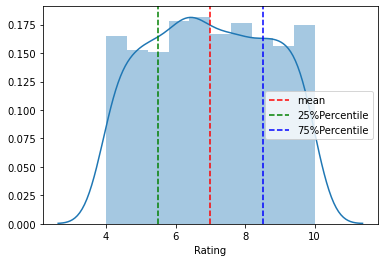

In [13]:
#what does the distribution of ratings look like and are they skewed?
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']),c='red',ls='--',label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green',ls='--',label='25%Percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='blue',ls='--',label='75%Percentile')
plt.legend()

array([[<AxesSubplot:title={'center':'Unitprice'}>,
        <AxesSubplot:title={'center':'Qty'}>,
        <AxesSubplot:title={'center':'Tax 5%'}>],
       [<AxesSubplot:title={'center':'Total'}>,
        <AxesSubplot:title={'center':'cogs'}>,
        <AxesSubplot:title={'center':'grossmarginpercentage'}>],
       [<AxesSubplot:title={'center':'grossincome'}>,
        <AxesSubplot:title={'center':'Rating'}>, <AxesSubplot:>]],
      dtype=object)

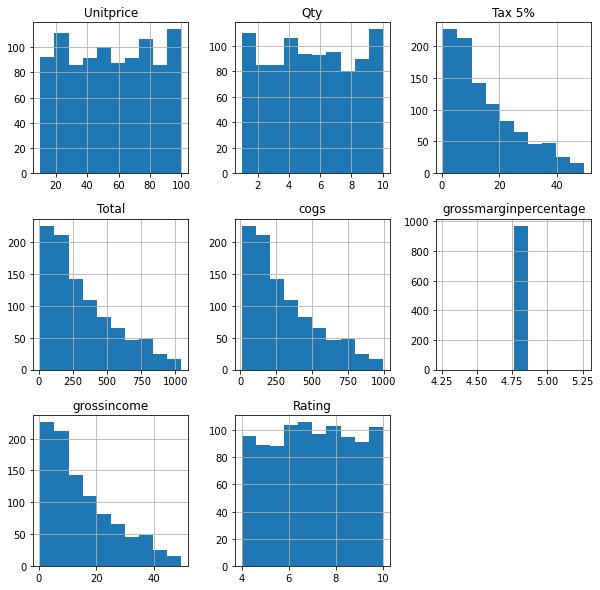

In [14]:
df.hist(figsize=(10,10))

<AxesSubplot:xlabel='Branch', ylabel='count'>

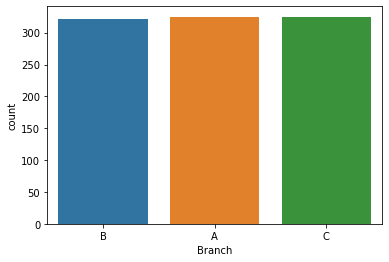

In [16]:
#using count plot to see any differences
sns.countplot(df['Branch'])

In [19]:
df['Branch'].value_counts()

A    325
C    324
B    322
Name: Branch, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

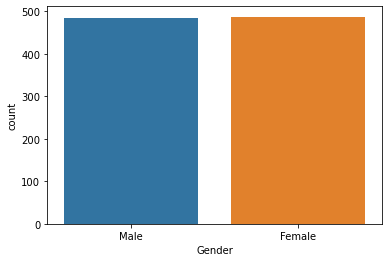

In [25]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Rating', ylabel='grossincome'>

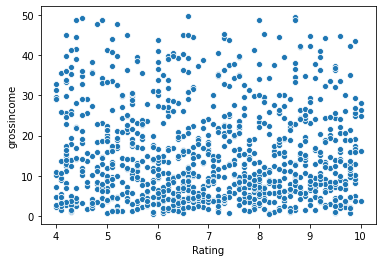

In [23]:
#see if correlation between Rating and gross income
sns.scatterplot(df['Rating'],df['grossincome'])

<AxesSubplot:xlabel='Rating', ylabel='grossincome'>

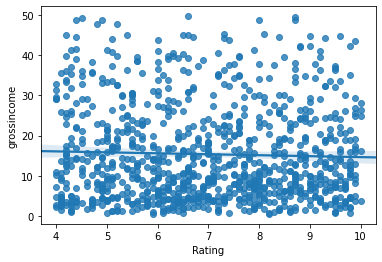

In [24]:
sns.regplot(df['Rating'],df['grossincome'])

<AxesSubplot:xlabel='Rating', ylabel='grossincome'>

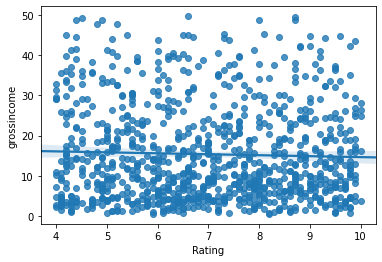

In [24]:
sns.regplot(df['Rating'],df['grossincome'])

<AxesSubplot:xlabel='Branch', ylabel='grossincome'>

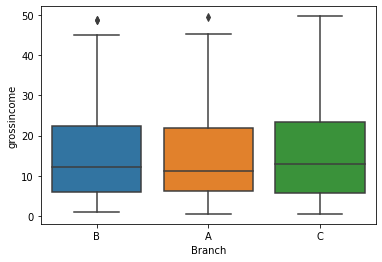

In [30]:
sns.boxplot(x=df['Branch'],y=df['grossincome'])

<AxesSubplot:xlabel='Gender', ylabel='grossincome'>

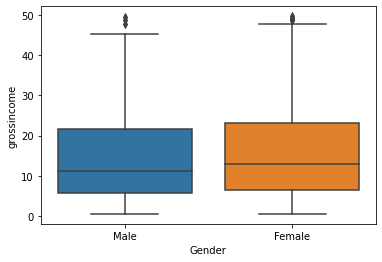

In [31]:
#see if they are any differences between gender and grossincome
sns.boxplot(x=df['Gender'],y=df['grossincome'])

In [32]:
df.groupby(df.index).mean()

,Unitprice,Qty,Tax 5%,Total,cogs,grossmarginpercentage,grossincome,Rating
Date,,,,,,,,
2019-01-01,53.394545,6.500000,18.561636,389.794364,371.232727,4.761905,18.561636,6.554545
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667
2019-01-05,60.450000,4.363636,12.933818,271.610182,258.676364,4.761905,12.933818,7.281818
...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000


In [33]:
df.groupby(df.index).mean().index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12',
               '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-19', '2019-01-20',
               '2019-01-21', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
               '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17',
               '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
               '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
      

<AxesSubplot:xlabel='Date', ylabel='grossincome'>

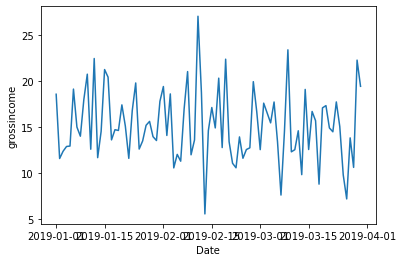

In [34]:
sns.lineplot(x=df.groupby(df.index).mean().index,
             y=df.groupby(df.index).mean()['grossincome'])

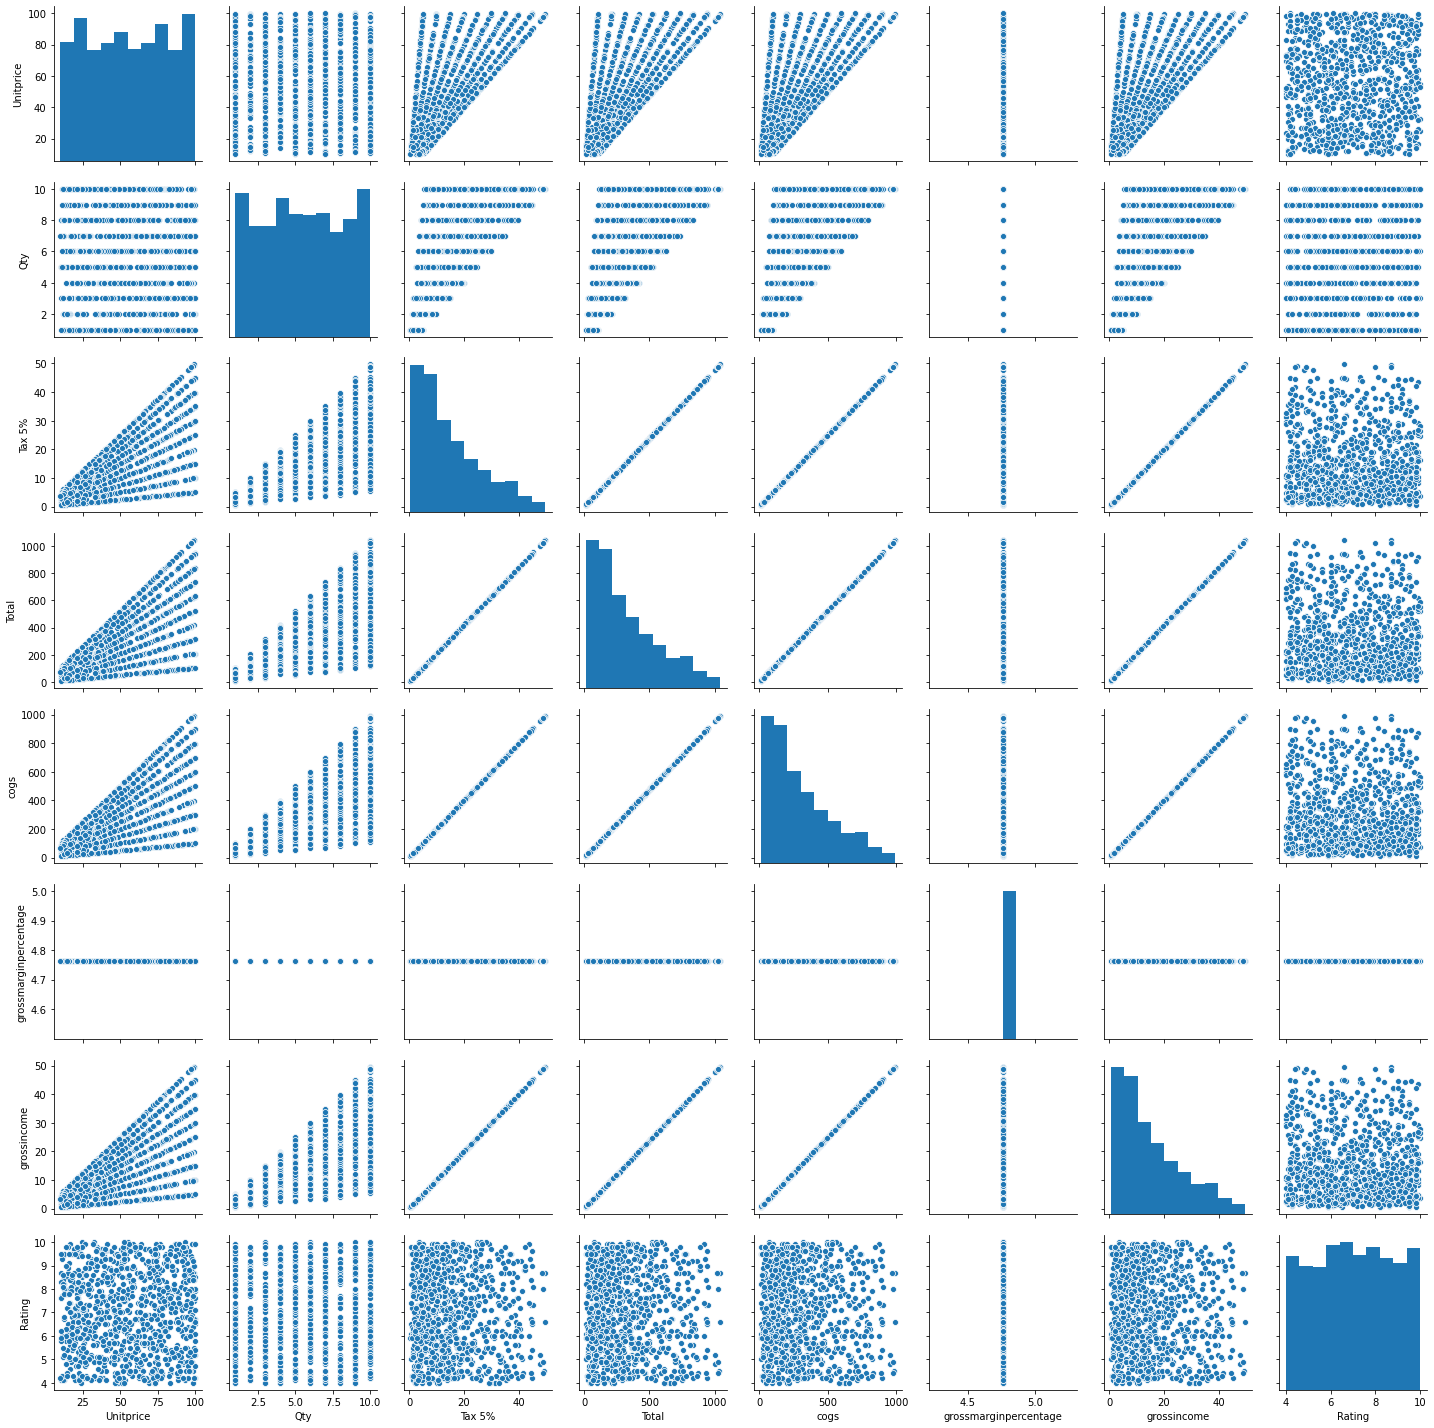

In [35]:
#plot for every type of combination 
sns.pairplot(df)

In [37]:
#look for duplicate rows 
df.duplicated()

Date
2019-01-10    False
2019-03-15    False
2019-02-06    False
2019-01-07    False
2019-03-10    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 971, dtype: bool

In [38]:
df.duplicated().sum()

3

In [39]:
#view duplicate rows
df[df.duplicated()==True]

,InvoiceID,Branch,City,CustomerTyper,Gender,ProductLine,Unitprice,Qty,Tax 5%,Total,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
Date,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5


In [40]:
#delete duplicate rows
df.drop_duplicates(inplace=True)

In [41]:
df.duplicated().sum()

0

In [42]:
#sum of missing values
df.isna().sum()

InvoiceID                 0
Branch                    0
City                      0
CustomerTyper            78
Gender                    0
ProductLine              39
Unitprice                 6
Qty                      19
Tax 5%                    0
Total                     0
Time                      0
Payment                   0
cogs                      0
grossmarginpercentage     0
grossincome               0
Rating                    0
dtype: int64

In [43]:
#view the missing values in ratio
df.isna().sum()/len(df)

InvoiceID                0.000000
Branch                   0.000000
City                     0.000000
CustomerTyper            0.080579
Gender                   0.000000
ProductLine              0.040289
Unitprice                0.006198
Qty                      0.019628
Tax 5%                   0.000000
Total                    0.000000
Time                     0.000000
Payment                  0.000000
cogs                     0.000000
grossmarginpercentage    0.000000
grossincome              0.000000
Rating                   0.000000
dtype: float64

<AxesSubplot:ylabel='Date'>

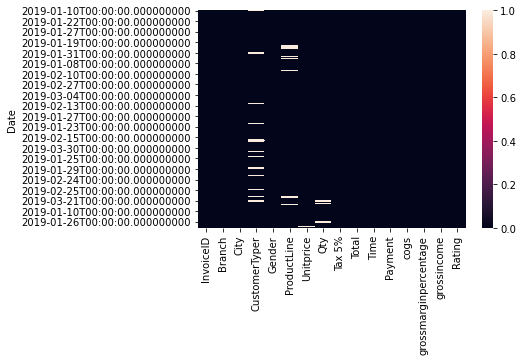

In [44]:
#view missing data
sns.heatmap(df.isnull())

<AxesSubplot:ylabel='Date'>

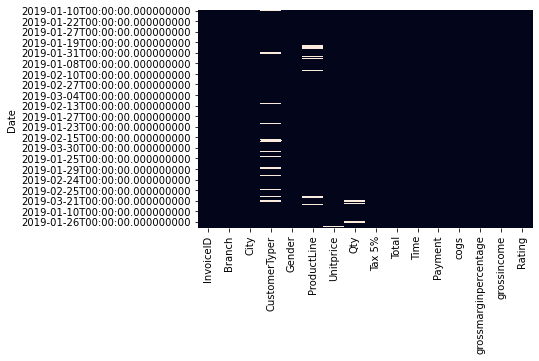

In [45]:
#remove the heat bar 
sns.heatmap(df.isnull(),cbar=False)

In [47]:
#fill in missing data numeric values
#df.fillna(0) - update missing data with zero
df.fillna(df.mean(),inplace=True) #fill missing data with the mean 

In [49]:
#find the mode of each column
df.mode().iloc[0]

InvoiceID                        101-17-6199
Branch                                     C
City                               Naypyitaw
CustomerTyper                         Normal
Gender                                Female
ProductLine              Fashion accessories
Unitprice                            55.5561
Qty                                       10
Tax 5%                                 4.154
Total                                 87.234
Time                                   14:42
Payment                                 Cash
cogs                                   83.08
grossmarginpercentage                 4.7619
grossincome                            4.154
Rating                                     6
Name: 0, dtype: object

In [51]:
df.fillna(df.mode().iloc[0],inplace=True)

<AxesSubplot:ylabel='Date'>

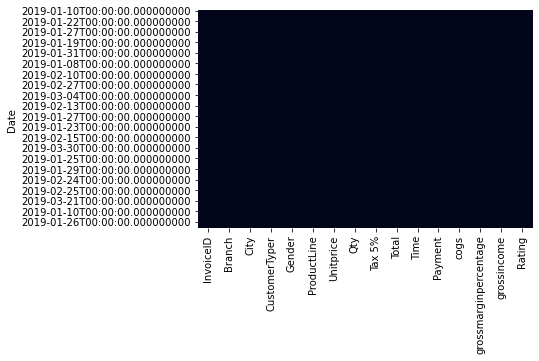

In [52]:
#check to see if data is still missing
sns.heatmap(df.isnull(),cbar=False)

In [53]:
#finding corr coef
np.corrcoef(df['grossincome'],df['Rating'])

array([[ 1.        , -0.03234464],
       [-0.03234464,  1.        ]])

In [54]:
np.corrcoef(df['grossincome'],df['Rating'])[0][1]

-0.03234463723993834

In [55]:
#round 
round(np.corrcoef(df['grossincome'],df['Rating'])[0][1],2)

-0.03

In [59]:
np.round(df.corr(),2)

,Unitprice,Qty,Tax 5%,Total,cogs,grossmarginpercentage,grossincome,Rating
Unitprice,1.00,0.01,0.63,0.63,0.63,0.0,0.63,0.00
Qty,0.01,1.00,0.70,0.70,0.70,-0.0,0.70,-0.03
Tax 5%,0.63,0.70,1.00,1.00,1.00,-0.0,1.00,-0.03
Total,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.03
cogs,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.03
grossmarginpercentage,0.00,-0.00,-0.00,0.00,0.00,1.0,-0.00,0.00
grossincome,0.63,0.70,1.00,1.00,1.00,-0.0,1.00,-0.03
Rating,0.00,-0.03,-0.03,-0.03,-0.03,0.0,-0.03,1.00


<AxesSubplot:>

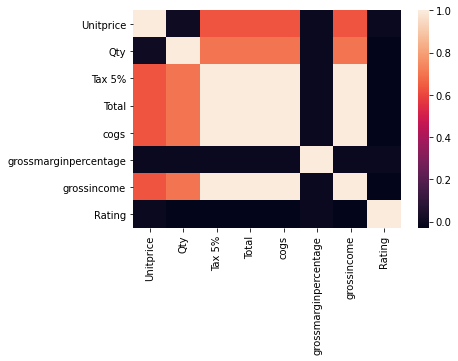

In [61]:
sns.heatmap(np.round(df.corr(),2))

<AxesSubplot:>

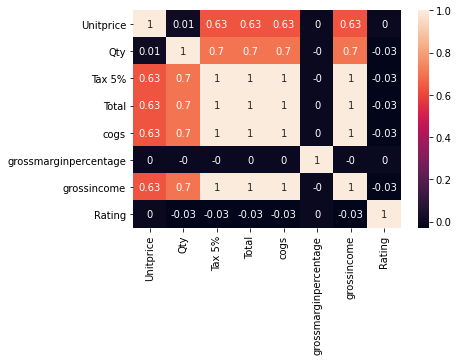

In [62]:
sns.heatmap(np.round(df.corr(),2),annot=True)